In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from datetime import datetime
import math

In [2]:
eval_docentes_file = '../data/eval_docentes_periodo.csv'
teachers_assessment = pd.read_csv(eval_docentes_file, delimiter = ';', encoding = "ISO-8859-1")
teachers_assessment.head()

,PERIODO,COD_DOCENTE,COD_MAT,COD_FACTOR,NOM_FACTOR,CALIFICACION
0,201210,1008,66410,1,Asistencia y Puntualidad,"4,63"
1,201210,1008,66410,2,Relación profesor alumno,"4,65"
2,201210,1008,66410,3,Orientación del proceso de formación,"4,58"
3,201210,1008,66410,4,Conocimientos,"4,71"
4,201210,1008,66410,5,Planeación del proceso de formación,"4,72"


In [3]:
teacher_1008 = teachers_assessment[(teachers_assessment['COD_DOCENTE'] == 1008)]
teacher_1008_2012 = teacher_1008[(teacher_1008['PERIODO'] == 201210)]
teacher_1008_2012

,PERIODO,COD_DOCENTE,COD_MAT,COD_FACTOR,NOM_FACTOR,CALIFICACION
0,201210,1008,66410,1,Asistencia y Puntualidad,"4,63"
1,201210,1008,66410,2,Relación profesor alumno,"4,65"
2,201210,1008,66410,3,Orientación del proceso de formación,"4,58"
3,201210,1008,66410,4,Conocimientos,"4,71"
4,201210,1008,66410,5,Planeación del proceso de formación,"4,72"
5,201210,1008,66410,6,Evaluación del aprendizaje,"4,70"
6,201210,1008,66410,7,Imagen y Orden,"4,68"
7,201210,1008,66410,8,Compromiso Institucional,"4,76"
8,201210,1008,66410,9,Investigación y extensión,"4,64"
9,201210,1008,66510,1,Asistencia y Puntualidad,"4,80"


In [4]:
teachers_assessment.NOM_FACTOR.value_counts()

Relación profesor alumno                28118
Orientación del proceso de formación    28118
Conocimientos                           28117
Planeación del proceso de formación     28114
Evaluación del aprendizaje              28112
Investigación y extensión               28112
Asistencia y Puntualidad                26947
Imagen y Orden                          26941
Compromiso Institucional                26937
Compromiso institucional                 1173
Tutoría virtual                          1173
Material didáctico                       1173
Name: NOM_FACTOR, dtype: int64

In [5]:
teachers_assessment.COD_FACTOR.value_counts()

1     26947
2     26945
3     26945
4     26944
7     26941
5     26941
6     26939
9     26939
8     26937
10     1173
17     1173
11     1173
12     1173
13     1173
14     1173
15     1173
16     1173
18     1173
Name: COD_FACTOR, dtype: int64

In [6]:
factors_grouped = teachers_assessment.groupby(['COD_FACTOR', 'NOM_FACTOR'])[['COD_DOCENTE']].count()
factors_grouped

,,COD_DOCENTE
COD_FACTOR,NOM_FACTOR,
1,Asistencia y Puntualidad,26947
2,Relación profesor alumno,26945
3,Orientación del proceso de formación,26945
4,Conocimientos,26944
5,Planeación del proceso de formación,26941
6,Evaluación del aprendizaje,26939
7,Imagen y Orden,26941
8,Compromiso Institucional,26937
9,Investigación y extensión,26939


In [7]:
for column in teachers_assessment.columns:
    teachers_assessment[column] = teachers_assessment[column].astype(str)
    
teachers_assessment['CALIFICACION'] = teachers_assessment['CALIFICACION'].str.replace(',','.').astype('float')

In [8]:
teachers_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253035 entries, 0 to 253034
Data columns (total 6 columns):
PERIODO         253035 non-null object
COD_DOCENTE     253035 non-null object
COD_MAT         253035 non-null object
COD_FACTOR      253035 non-null object
NOM_FACTOR      253035 non-null object
CALIFICACION    253035 non-null float64
dtypes: float64(1), object(5)
memory usage: 11.6+ MB


In [9]:
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('12', '2')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('13', '3')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('14', '4')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('15', '5')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('16', '6')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('17', '9')
teachers_assessment['COD_FACTOR'] = teachers_assessment['COD_FACTOR'].str.replace('18', '8')

In [10]:
grouped_by_teacher = teachers_assessment.groupby('COD_DOCENTE')[['CALIFICACION']].mean().reset_index()
grouped_by_teacher.columns = ['COD_DOCENTE', 'CALIFICACION_mean']

Text(0.5, 1.0, 'Califications histogram')

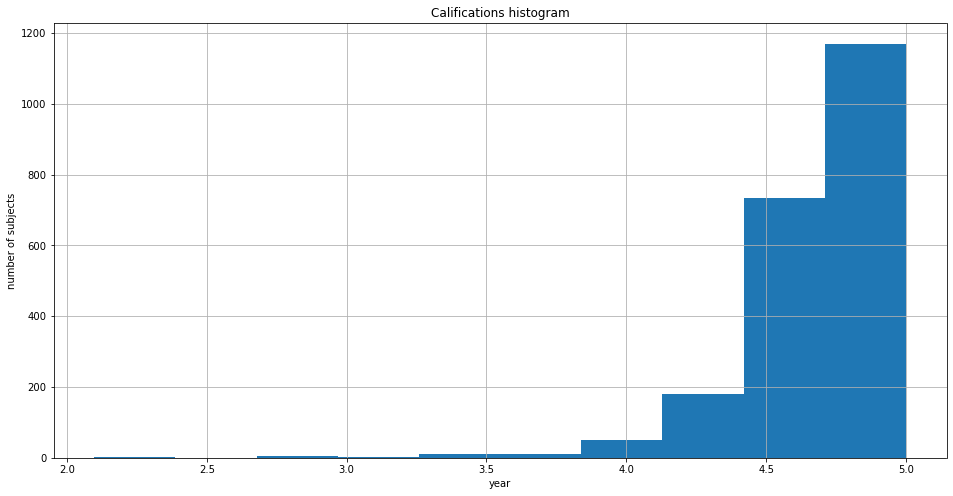

In [11]:
fig, ax = plt.subplots(figsize = (16,8))
plt.hist(grouped_by_teacher['CALIFICACION_mean'])
ax.grid(True)
ax.set_xlabel('year')
ax.set_ylabel('number of subjects')
ax.set_title('Califications histogram')

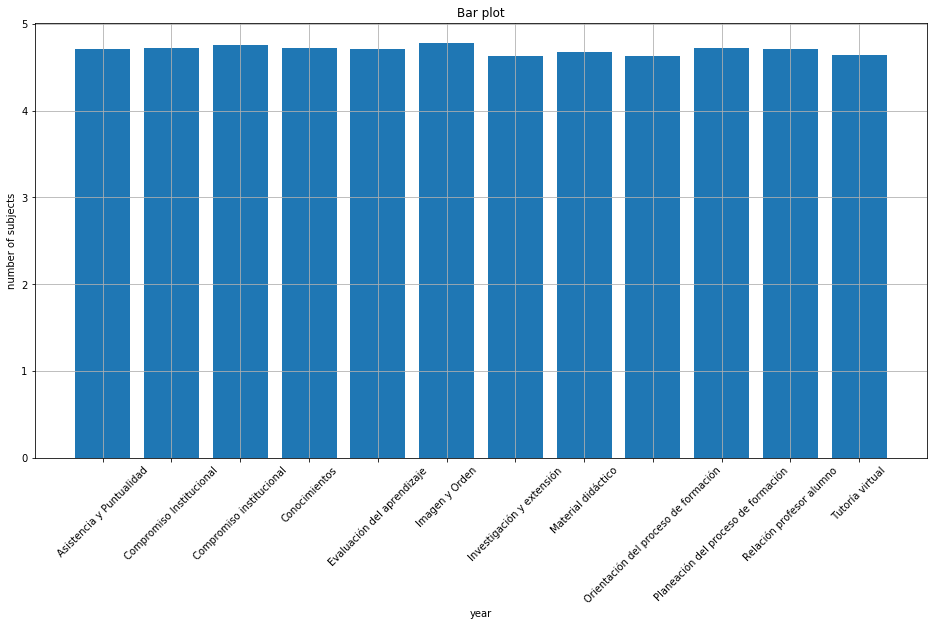

In [12]:
grouped_by_factor = teachers_assessment.groupby('NOM_FACTOR')[['CALIFICACION']].mean().reset_index()
grouped_by_factor.columns = ['NOM_FACTOR', 'CALIFICACION_mean']

fig, ax = plt.subplots(figsize = (16,8))
plt.bar(grouped_by_factor['NOM_FACTOR'], grouped_by_factor['CALIFICACION_mean'])
ax.grid(True)
ax.set_xlabel('year')
ax.set_ylabel('number of subjects')
ax.set_title('Bar plot')
plt.xticks(rotation=45)
pass

In [13]:
rendimiento_file_new = '../data/rendimiento_académico_new.csv'
student_performance_new = pd.read_csv(rendimiento_file_new)

In [14]:
student_performance_new.head()

,Unnamed: 0,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO,COD_DOCENTE
0,0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA,622.0
1,1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA,1329.0
2,2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA,NaN
3,3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA,4016.0
4,4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA,1329.0


In [17]:
len(student_performance_new)

364492

In [16]:
student_performance_new['COD_DOCENTE'].isna().sum()

93336

In [15]:
df_reprobados = student_performance_new[student_performance_new['ESTADO'] == 'NO APROBADA' ]
df_reprobados_docente = df_reprobados.groupby('COD_DOCENTE')[['ESTADO']].count().sort_values('ESTADO',ascending = False)
df_reprobados_docente = df_reprobados_docente.reset_index()
df_reprobados_docente.columns = ['COD_DOCENTE', 'num_reprobados']
df_reprobados_docente['num_materias_dictadas'] = np.nan
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados,num_materias_dictadas
0,3168.0,443,NaN
1,613.0,412,NaN
2,2925.0,356,NaN
3,3313.0,346,NaN
4,2927.0,338,NaN


In [51]:
df_materias_docente = student_performance_new.groupby('COD_DOCENTE')[['ESTADO']].count()\
                        .sort_values('ESTADO',ascending = False).reset_index()

df_materias_docente.columns = ['COD_DOCENTE', 'num_materias_dictadas']
df_materias_docente.head()

,COD_DOCENTE,num_materias_dictadas
0,2826.0,2240
1,3132.0,1968
2,2482.0,1728
3,3954.0,1715
4,2927.0,1441


In [52]:
for idx in range(0, len(df_reprobados_docente)):
    cod_docente = int(df_reprobados_docente.loc[idx, 'COD_DOCENTE'])
    
    try:
        materias_dictadas = df_materias_docente[(df_materias_docente['COD_DOCENTE'] == cod_docente)]\
                                                        ['num_materias_dictadas'].values[0]
    except:
        materias_dictadas = np.nan   
        
    df_reprobados_docente.loc[idx, 'num_materias_dictadas'] = materias_dictadas

In [53]:
df_reprobados_docente['proporcion_reprobados'] = \
                df_reprobados_docente['num_reprobados']/df_reprobados_docente['num_materias_dictadas']
df_reprobados_docente = df_reprobados_docente.sort_values('proporcion_reprobados', ascending = False)
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados,num_materias_dictadas,proporcion_reprobados
707,4095.0,10,10.0,1.000000
1285,4866.0,1,1.0,1.000000
1046,5090.0,3,5.0,0.600000
815,3793.0,7,12.0,0.583333
277,3335.0,44,86.0,0.511628


In [54]:
df_reprobados_docente['COD_DOCENTE'] = [math.trunc(i) for i in df_reprobados_docente['COD_DOCENTE']]
df_reprobados_docente['COD_DOCENTE'] = df_reprobados_docente['COD_DOCENTE'].astype(str)
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados,num_materias_dictadas,proporcion_reprobados
707,4095,10,10.0,1.000000
1285,4866,1,1.0,1.000000
1046,5090,3,5.0,0.600000
815,3793,7,12.0,0.583333
277,3335,44,86.0,0.511628


In [65]:
grouped_by_teacher.head()

,COD_DOCENTE,CALIFICACION_mean
0,0,4.453878
1,1,4.807778
2,1008,4.709947
3,101,4.365111
4,1015,4.750601


In [74]:
df_reprobados_docente['CALIFICACION'] = np.nan

In [97]:
for idx in range(0, len(df_reprobados_docente)):
    
    cod_docente = df_reprobados_docente.loc[idx, 'COD_DOCENTE']
    
    try:
        
        calificacion = grouped_by_teacher[grouped_by_teacher['COD_DOCENTE'] == cod_docente]['CALIFICACION_mean'].values[0]
        
        
    except:
        calificacion = np.nan
    
    df_reprobados_docente.loc[idx, 'CALIFICACION'] = calificacion

In [104]:
df_reprobados_docente.head()
df_reprobados_treshold = df_reprobados_docente[df_reprobados_docente['num_materias_dictadas']>50]

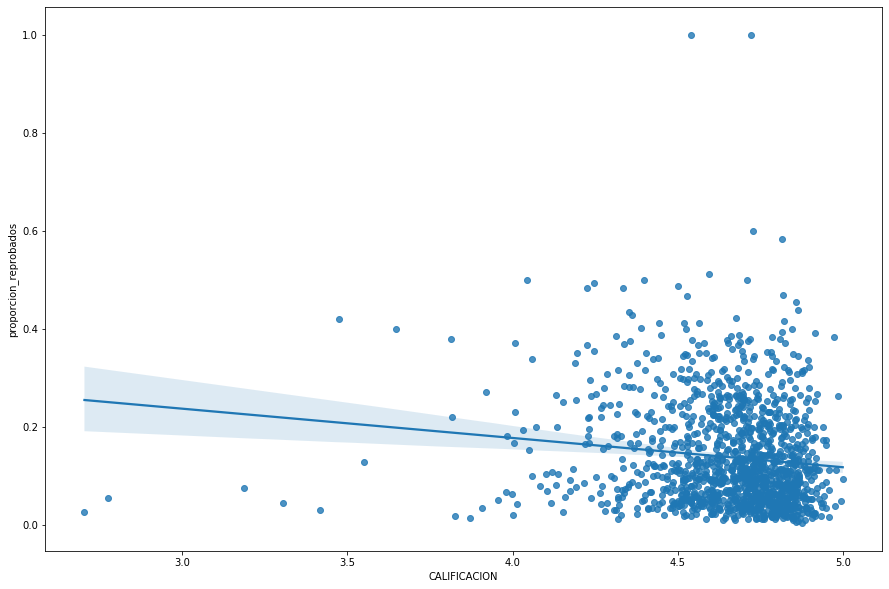

In [105]:
fig, axes = plt.subplots(figsize = (15, 10))

sns.regplot(x="CALIFICACION", y="proporcion_reprobados", data=df_reprobados_docente)

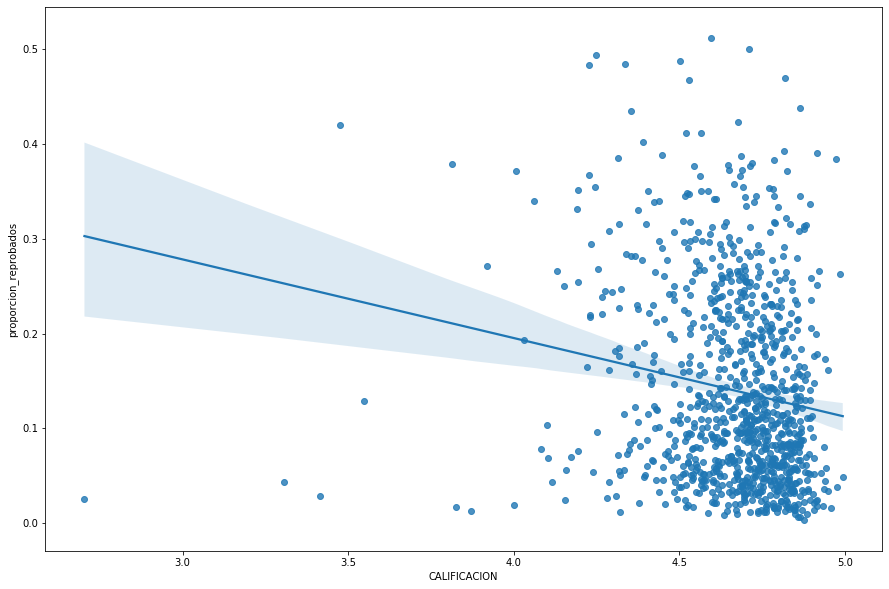

In [108]:
fig, axes = plt.subplots(figsize = (15, 10))

sns.regplot(x="CALIFICACION", y="proporcion_reprobados", data=df_reprobados_treshold)
